# BLACK FRIDAY SALES EDA, FEATURE ENGINEERING & PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the data from csv to dataframe

In [2]:
df_train=pd.read_csv("D:/Liveness converted photos of monis/OneDrive/Desktop/project/train.csv")

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test=pd.read_csv("D:/Liveness converted photos of monis/OneDrive/Desktop/project/test.csv")

In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


### Basic Info about the dataframes

In [6]:
df_train.shape

(550068, 12)

In [7]:
df_test.shape

(233599, 11)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### I. How does the gender distribution of purchases compare between males and females?

In [9]:
Gender_index=df_train.groupby('Gender')['Purchase'].size().index
Gender_vals= df_train.groupby('Gender')['Purchase'].size().values
Gender_vals_sum= df_train.groupby('Gender')['Purchase'].sum().values

In [10]:
Gender_index, Gender_vals

(Index(['F', 'M'], dtype='object', name='Gender'),
 array([135809, 414259], dtype=int64))

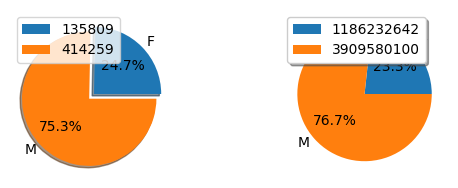

In [11]:
plt.subplot(2,2,1)
plt.pie(Gender_vals, labels=Gender_index, autopct='%1.1f%%', explode=[0,0.1], shadow=True)
plt.legend(Gender_vals,loc='upper left')

plt.subplot(2,2,2)
plt.pie(Gender_vals_sum, labels=Gender_index, autopct='%1.1f%%')
plt.legend(Gender_vals_sum, loc='upper left', shadow=True)

##### Conclusion I: Using the pie-chart and the bar chart, we can conclude that Males tend to purchase more than the Females. And the total purchase of Male is greater than the total purchase of Female.

### II. How does the purchasing behavior vary across different age groups, and what insights does the observed male-to-female ratio provide regarding purchasing preferences within each age group?

In [12]:
Age_cmp=df_train.groupby('Age')['Purchase'].size().reset_index()
Age_gen_cmp=df_train.groupby(['Gender', 'Age']).size().reset_index(name='Count')

<Axes: xlabel='Age', ylabel='Count'>

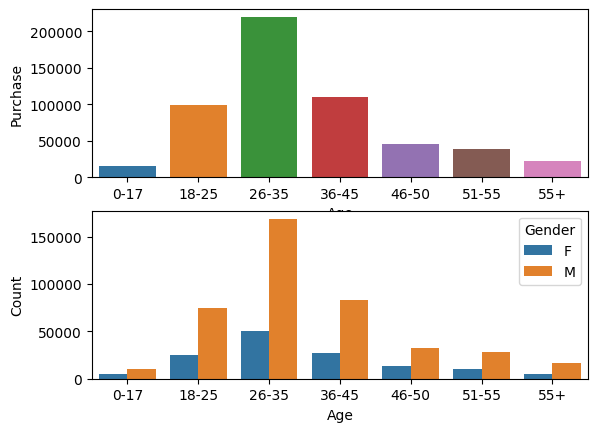

In [13]:
plt.subplot(2,1,1)
sns.barplot(x=Age_cmp['Age'], y=Age_cmp['Purchase'], hue=Age_cmp['Age'])

plt.subplot(2,1,2)
sns.barplot(x=Age_gen_cmp['Age'], y=Age_gen_cmp['Count'], hue=Age_gen_cmp['Gender'])

##### Conculsion II: As per the above vizs, we can conclude that the age group of 26-35 have the most purchases whereas 0-17 has the least. The males to females ratio is also significant throughout the age groups.

### III. How does marital status influence purchasing behavior during the Black Friday Sale?

In [14]:
Marital_cmp=df_train.groupby('Marital_Status')['Purchase'].size().reset_index()
Marital_cmp['Marital_Status']=Marital_cmp['Marital_Status'].astype(str)

C:\Users\admin\AppData\Local\Temp\ipykernel_17172\150028640.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Marital_cmp,x='Marital_Status', y='Purchase', palette='winter', width=0.4)


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

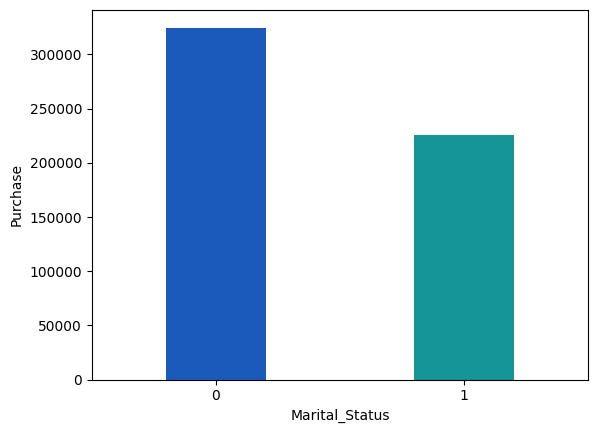

In [15]:
sns.barplot(data=Marital_cmp,x='Marital_Status', y='Purchase', palette='winter', width=0.4)

##### Conclusion III: As we can see based on the above viz, unmarried i.e '0' people tend to purchase more during the Black Friday Sale than Married.

### IV. What insights can be gleaned from the observed disparity in purchase behavior across the occupation of the individual?

In [16]:
Occ_cmp=df_train.groupby('Occupation')['Purchase'].size().reset_index().sort_values(by='Purchase', ascending=False)
Occ_cmp['Occupation']=Occ_cmp['Occupation'].astype(str)

<Axes: xlabel='Occupation', ylabel='Purchase'>

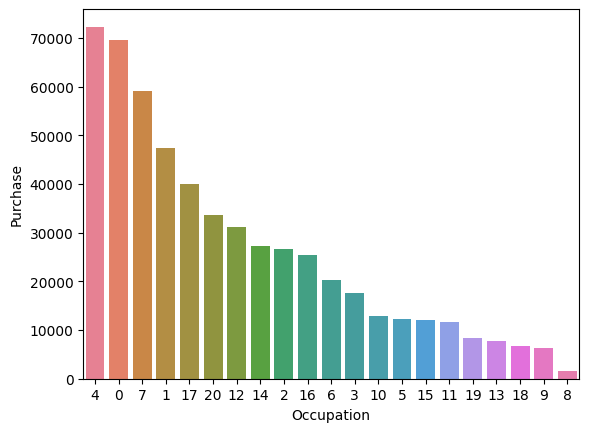

In [17]:
sns.barplot(data=Occ_cmp,x='Occupation', y='Purchase', hue='Occupation')

##### Conclusion IV: We can conclude on the basis of the above data representation that people with occupation '4' tend to purchase more during the black friday sale whereas the people of occupation '8' tend to purchase the least.

### V. How does the purchasing behavior vary among residents of different cities, particularly between those residing in different cities?

In [18]:
City_cmp_index=df_train.groupby('City_Category')['Purchase'].sum().index
City_cmp_val=df_train.groupby('City_Category')['Purchase'].sum().values

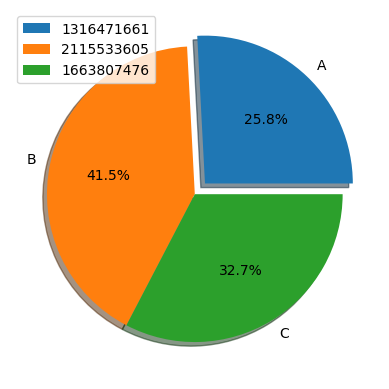

In [19]:
plt.pie(City_cmp_val, labels=City_cmp_index, autopct='%1.1f%%', explode=[0.1,0,0], shadow=True)
plt.legend(City_cmp_val)

##### Conclusion V: People from city 'B' tend to purchase the most in comparison to the other cities whereas the people from city 'A' tend to purchase the least. 

### VI. What patterns emerge regarding purchasing behavior based on the length of time individuals have been residing in a city?

In [20]:
Stay_cmp=df_train.groupby('Stay_In_Current_City_Years')['Purchase'].size().reset_index()

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

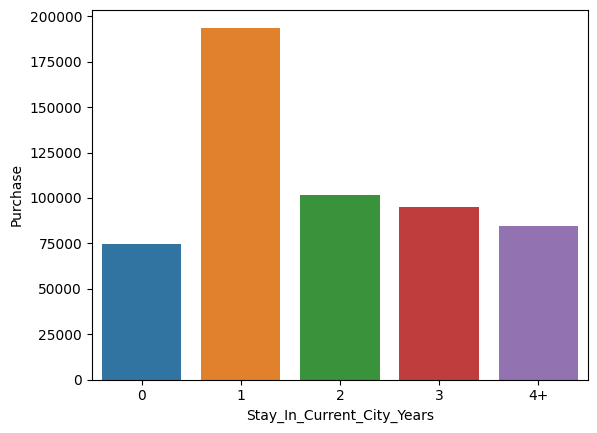

In [21]:
sns.barplot(data=Stay_cmp, x='Stay_In_Current_City_Years', y='Purchase', hue='Stay_In_Current_City_Years')

##### Conclusion VI: As per the data shown in the above viz, we can conclude that people who have been living in the city for a year tend to purchase more in comparison the the other people whereas people who have just shifted or are living in the city for less than a year tend to shop the least.

### Handling Null values across the DataFrame

In [22]:
df_train.isnull().sum().reset_index(name='null_count')

,index,null_count
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category_1,0
9,Product_Category_2,173638


In [23]:
[feature for feature in df_train.columns if df_train[feature].isnull().sum()>0]

['Product_Category_2', 'Product_Category_3']

<Axes: >

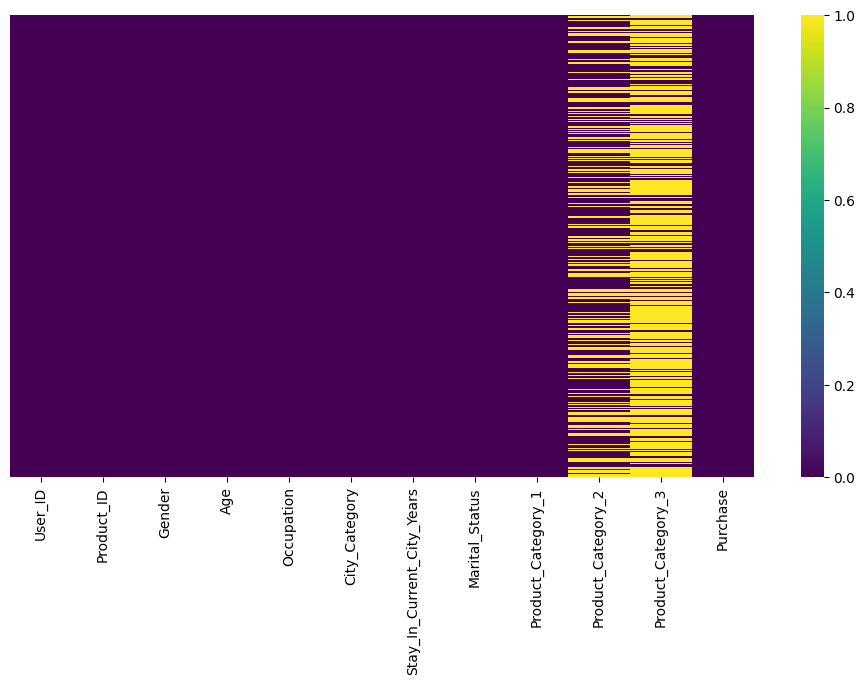

In [24]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df_train.isnull(), yticklabels=False, cmap='viridis')

##### As per the viz, we can see there are null values present in the product_category_2, and product_category_3.

In [25]:
df_train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

##### For handling null values in this scenario of product_Categories, we cant use mean or median because a category cant be in float. Hence, we will use mode to fill the na values for each Product_category.

In [26]:
df_train['Product_Category_2']=df_train['Product_Category_2'].fillna(value=df_train['Product_Category_2'].mode()[0])
df_train['Product_Category_3']=df_train['Product_Category_3'].fillna(value=df_train['Product_Category_3'].mode()[0])

In [27]:
df_train['Product_Category_2']=df_train['Product_Category_2'].astype(int)
df_train['Product_Category_3']=df_train['Product_Category_3'].astype(int)

In [28]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8,16,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8,16,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,16,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8,16,7969


In [29]:
df_train.isnull().sum().reset_index(name='null_count')

,index,null_count
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category_1,0
9,Product_Category_2,0


### VII. How do the purchasing patterns differ across various product categories?

In [30]:
cate_1_cmp=df_train.groupby('Product_Category_1')['Purchase'].sum().reset_index(name='Total_Purchase').sort_values(by='Total_Purchase', ascending=False)
cate_2_cmp=df_train.groupby('Product_Category_2')['Purchase'].sum().reset_index(name='Total_Purchase').sort_values(by='Total_Purchase', ascending=False)
cate_3_cmp=df_train.groupby('Product_Category_3')['Purchase'].sum().reset_index(name='Total_Purchase').sort_values(by='Total_Purchase', ascending=False)

In [31]:
cate_1_cmp['Product_Category_1']=cate_1_cmp['Product_Category_1'].astype(int).astype(str)
cate_2_cmp['Product_Category_2']=cate_2_cmp['Product_Category_2'].astype(int).astype(str)
cate_3_cmp['Product_Category_3']=cate_3_cmp['Product_Category_3'].astype(int).astype(str)

In [32]:
cate_1_cmp.head(5),cate_2_cmp.head(5), cate_3_cmp.head(5)

(  Product_Category_1  Total_Purchase
 0                  1      1910013754
 4                  5       941835229
 7                  8       854318799
 5                  6       324150302
 1                  2       268516186,
    Product_Category_2  Total_Purchase
 6                   8      1963923886
 0                   2       670303864
 14                 16       445339722
 13                 15       392067176
 12                 14       391556939,
    Product_Category_3  Total_Purchase
 12                 16      3542035326
 11                 15       345662769
 2                   5       201858094
 13                 17       196581588
 10                 14       185249212)

<Axes: xlabel='Product_Category_3', ylabel='Total_Purchase'>

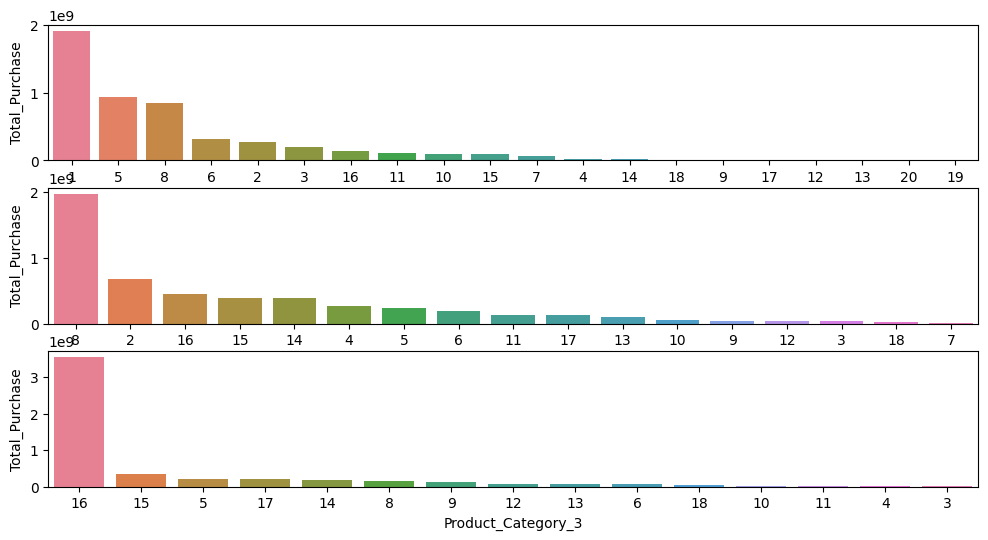

In [33]:
plt.subplot(3,1,1)
sns.barplot(data=cate_1_cmp,x='Product_Category_1', y='Total_Purchase', hue='Product_Category_1')

plt.subplot(3,1,2)
sns.barplot(data=cate_2_cmp,x='Product_Category_2', y='Total_Purchase', hue='Product_Category_2')

plt.subplot(3,1,3)
sns.barplot(data=cate_3_cmp,x='Product_Category_3', y='Total_Purchase', hue='Product_Category_3')

##### Conclusion VII: As per the above viz, which is comparing how data is distributed amidst each product_categories. We can conclude that:

- Product_category_1: Category 1 is the most purchased/produces the most revenue whereas category 19 is the least purchased/produces less revenue.

- Product_category_2: Category 8 is the most purchased/produces the most revenue whereas category 7 is the least purchased/produces less revenue.

- Product_category_3: Category 16 is the most purchased/produces the most revenue whereas category 3 is the least purchased/produces less revenue.

### VIII. Find top 10 products that generate the most revenue.

In [34]:
Top_10_prod=df_train.groupby('Product_ID')['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False).head(10)

<Axes: xlabel='Product_ID', ylabel='Purchase'>

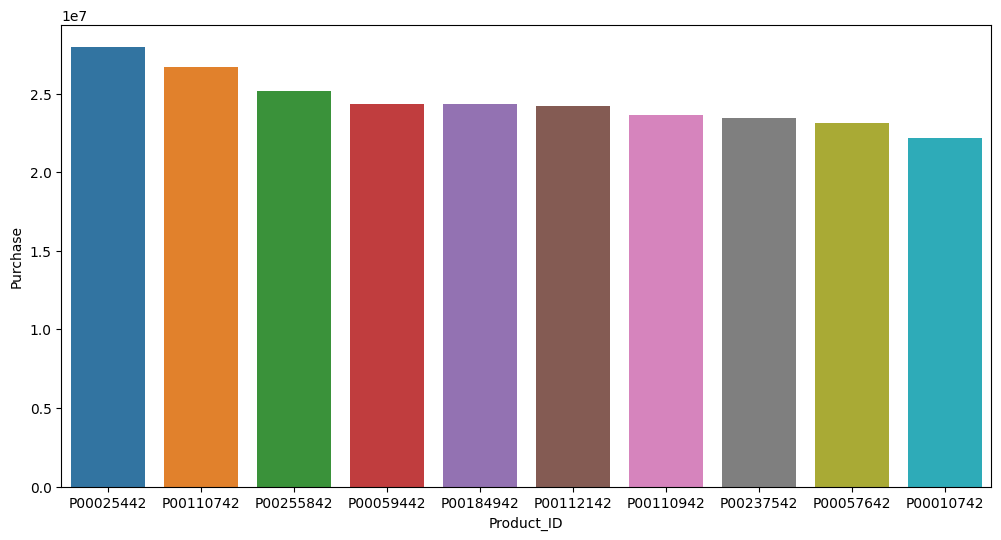

In [35]:
sns.barplot(data=Top_10_prod, x='Product_ID', y='Purchase', hue='Product_ID')

##### Conclusion VIII: Top 10 products are visualized by the above data. 1st being P00025442 and 10th being P00010742.

### IX. Top 10 Customers that generate the most revenue

In [36]:
User_id_cmp=df_train.groupby('User_ID')['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False).head(10)

<Axes: xlabel='User_ID', ylabel='Purchase'>

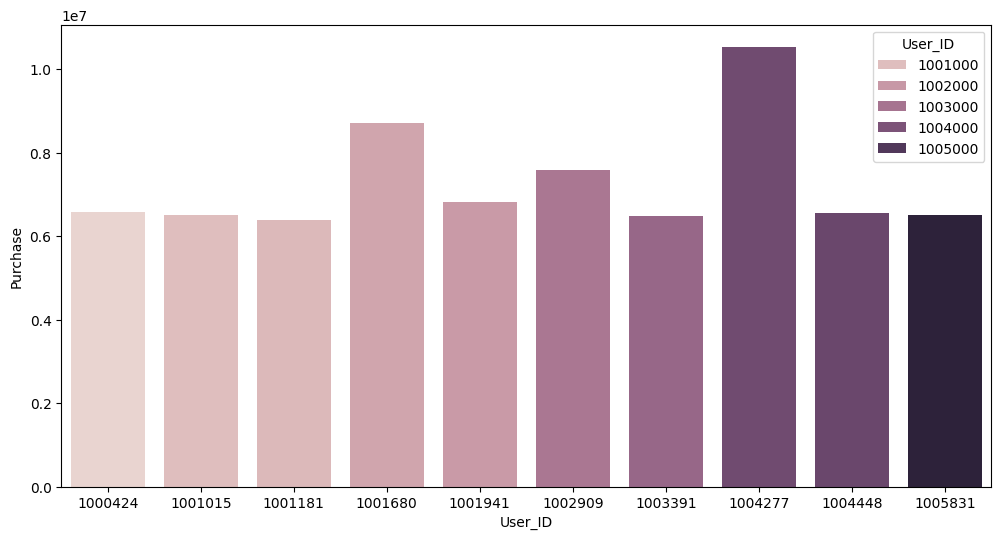

In [37]:
sns.barplot(data=User_id_cmp, x='User_ID', y='Purchase', hue='User_ID')

In [38]:
display(df_train.loc[df_train['User_ID']==1004277, 'Gender':'Marital_Status'].head(1))
display(df_train.loc[df_train['User_ID']==1001680, 'Gender':'Marital_Status'].head(1))
display(df_train.loc[df_train['User_ID']==1002909, 'Gender':'Marital_Status'].head(1))

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
27930,M,36-45,16,A,0,0


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
11055,M,26-35,20,A,3,1


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
18468,M,26-35,7,A,1,0


##### Conclusion IX: User 1004277 generates the most revenue on the Black Friday sale. Our Top 3 customers are following
#### Users are:
- All are Males 
- Two of them belong to (26-35) Age group whereas the third is from the adult category.
- All of them are from 'A' city_category
- Two are Unmarried and Third is Married
- Two of them are living in the current city for less than a year and third is living for more than 3 years.

### Will fetch the testing df and use mode of the column to fill 'na' values, just as we did for training data.

In [39]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [40]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(value=df_test['Product_Category_2'].mode()[0])
df_test['Product_Category_3']=df_test['Product_Category_3'].fillna(value=df_test['Product_Category_3'].mode()[0])

In [41]:
[feature for feature in df_test.columns if df_test[feature].isnull().sum()>0]

[]

##### We can see there are no more Null values present in our testing DataFrame. Now next step will be to concatenate both our datas and do feature engineering

### Joining the dataframes train and test. To do EDA and feature engineering to both at the same time.

In [42]:
df_fin=pd.concat([df_train, df_test], axis=0)

In [43]:
df_fin.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


In [44]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [45]:
df_fin.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

##### Null values in the purchase column are from our df_test DataFrame which is what we need to predict. Before doing that lets make our data ready for it.

### Handling outliers in the purchase column to avoid skewing our data.

<Axes: ylabel='Density'>

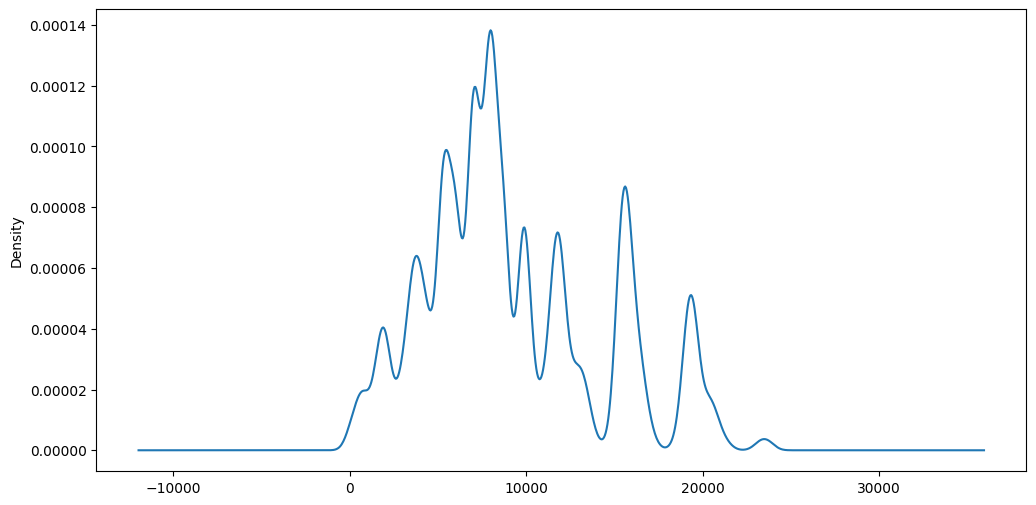

In [46]:
df_fin['Purchase'].plot(kind='density')

#### Using IQR to filter out the outliers and plotting the data in the box plot to visualize our filtered data.

In [47]:
Q1= df_fin['Purchase'].quantile(0.25)
Q3= df_fin['Purchase'].quantile(0.75)

Q1, Q3

(5823.0, 12054.0)

In [48]:
IQR=Q3-Q1
IQR

6231.0

In [49]:
upper_bound= Q3 + 1.5 *IQR
upper_bound

21400.5

In [50]:
df_fin['Purchase'].fillna(-1, inplace=True) #using fillna to fill our na values with a placeholder to avoid filtering it out.

df_fin=df_fin.loc[df_fin['Purchase']<=upper_bound]

C:\Users\admin\AppData\Local\Temp\ipykernel_17172\512540453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_fin['Purchase'], palette='winter')


<Axes: ylabel='Purchase'>

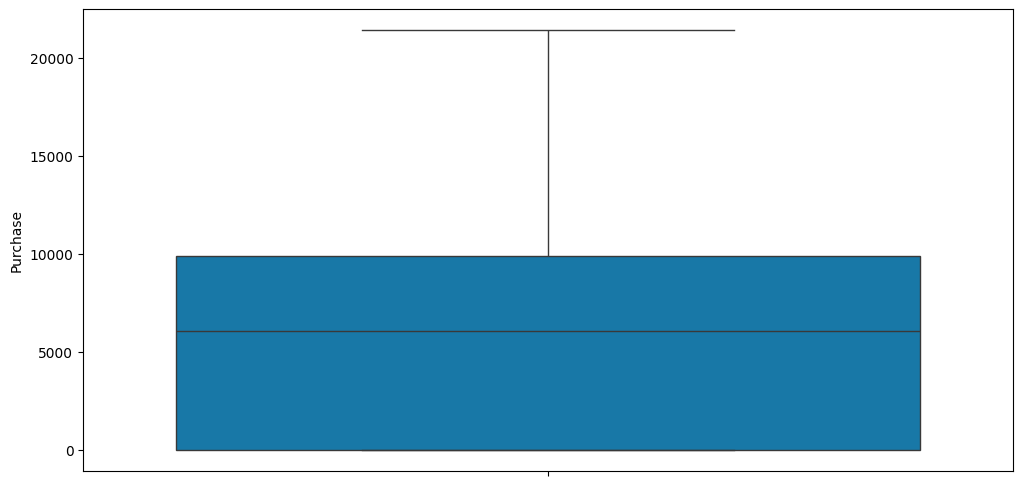

In [51]:
sns.boxplot(df_fin['Purchase'], palette='winter')

### Feature engineering using one hot encoding and label encoding on our categorical data.

In [52]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780990 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     780990 non-null  int64  
 1   Product_ID                  780990 non-null  object 
 2   Gender                      780990 non-null  object 
 3   Age                         780990 non-null  object 
 4   Occupation                  780990 non-null  int64  
 5   City_Category               780990 non-null  object 
 6   Stay_In_Current_City_Years  780990 non-null  object 
 7   Marital_Status              780990 non-null  int64  
 8   Product_Category_1          780990 non-null  int64  
 9   Product_Category_2          780990 non-null  float64
 10  Product_Category_3          780990 non-null  float64
 11  Purchase                    780990 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.5+ MB


In [53]:
df_fin.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


In [54]:
df_fin=pd.get_dummies(df_fin, columns=['Gender'], drop_first=True)
df_fin['Age']=df_fin['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})
df_fin['City_Category']=df_fin['City_Category'].map({'A':0,'B':1,'C':2})
df_fin['Stay_In_Current_City_Years']=df_fin['Stay_In_Current_City_Years'].str.replace('+','').astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_17172\1133336066.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_fin['Stay_In_Current_City_Years']=df_fin['Stay_In_Current_City_Years'].str.replace('+','').astype(int)


In [55]:
df_fin['Product_Category_1']=df_fin['Product_Category_1'].astype(int)
df_fin['Product_Category_2']=df_fin['Product_Category_2'].astype(int)
df_fin['Product_Category_3']=df_fin['Product_Category_3'].astype(int)
df_fin['Purchase']=df_fin['Purchase'].astype(int)

In [56]:
df_fin.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M
0,1000001,P00069042,1,10,0,2,0,3,8,16,8370,0
1,1000001,P00248942,1,10,0,2,0,1,6,14,15200,0
2,1000001,P00087842,1,10,0,2,0,12,8,16,1422,0
3,1000001,P00085442,1,10,0,2,0,12,14,16,1057,0
4,1000002,P00285442,7,16,2,4,0,8,8,16,7969,1


In [57]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780990 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     780990 non-null  int64 
 1   Product_ID                  780990 non-null  object
 2   Age                         780990 non-null  int64 
 3   Occupation                  780990 non-null  int64 
 4   City_Category               780990 non-null  int64 
 5   Stay_In_Current_City_Years  780990 non-null  int32 
 6   Marital_Status              780990 non-null  int64 
 7   Product_Category_1          780990 non-null  int32 
 8   Product_Category_2          780990 non-null  int32 
 9   Product_Category_3          780990 non-null  int32 
 10  Purchase                    780990 non-null  int32 
 11  Gender_M                    780990 non-null  uint8 
dtypes: int32(5), int64(5), object(1), uint8(1)
memory usage: 57.4+ MB


In [58]:
df_fin.drop(columns=['Product_ID'], axis=1, inplace=True)

### Predicting using RandomForest

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x=df_fin.loc[df_fin['Purchase']>-1]
X=x.drop(columns=['Purchase'], axis=1)

In [61]:
y=df_fin.loc[df_fin['Purchase']>-1, 'Purchase']

In [62]:
X.shape, y.shape

((547391, 10), (547391,))

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_train, y_train)

0.842730123416945

In [65]:
y_pred = rfr.predict(X_test)

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_test, y_pred)

0.6369320663329816

In [68]:
pred_df=pd.DataFrame({'Y actual': y_test, 'Y pred':y_pred}).reset_index(drop=True)
pred_df.head(10)

,Y actual,Y pred
0,9561,11348.118333
1,15211,14610.755667
2,6063,7734.464967
3,6947,7841.742785
4,9926,8136.267806
5,5349,5610.072818
6,10640,10446.042778
7,60,32.980000
8,3728,5578.754000
9,8654,5919.323167


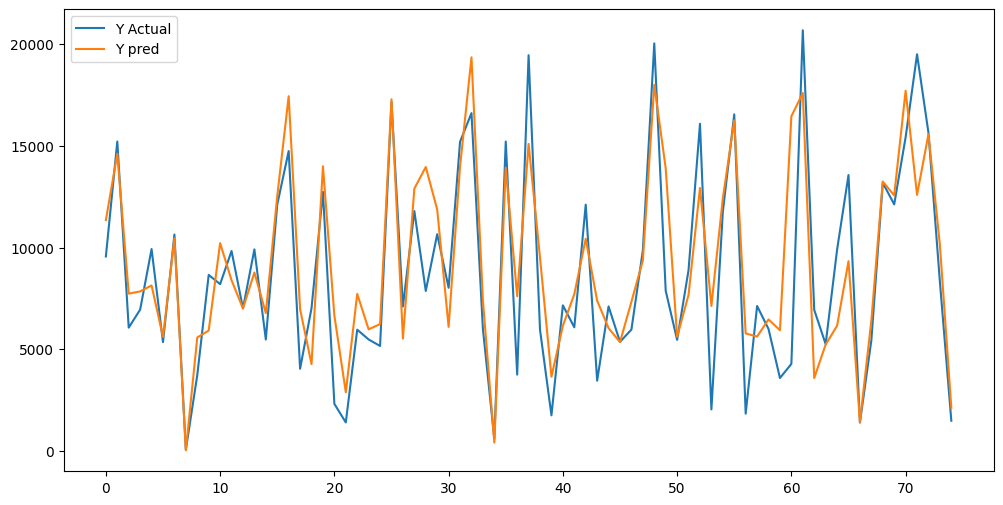

In [69]:
plt.plot(pred_df[:75])
plt.legend(["Y Actual", "Y pred"])

#### Conclusion:
- We have about 3631 different products
- We saw that the majority of the purchases have been done by the males.
- We saw that the majority of the purchases were done by young adults (26-35).
- We saw that unmarried people purchase more often than married.
- We saw that People with occupation '4' tend to purchase more during the black friday sale.
- We saw that City_category 'B' tend to purchase more.
- We saw that people living in the current city for a year tend to purchase more.
- We found out the top 10 products that generate the most revenue.
- We found top 3 customers that purchased the most and their info:
            -All are Males.
            -Two of them belong to (26-35) Age group whereas the third is from the adult category.
            -All of them are from 'A' city_category.
            -Two are Unmarried and Third is Married.
            -Two of them are living in the current city for less than a year and third is living for more than 3 years.
- At the end we built a model to predict purchases column with 64% R2 score.